<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/notebooks/teste_piloto_outros_repositorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Limpa projeto

In [1]:
!rm -rf promocity
!rm -rf accumulated*
!rm -rf dao.py
!rm -rf my_promocity.db
!rm -rf boxplot_com*
!rm -rf promocity_commits.csv
!rm -rf utils.py
!rm -rf requirements.txt
!rm -rf __pycache__/
!rm scatter_plot_mloc_foc_*
!rm scatter_plot_foc_amloc*
!rm boxplot_*
!rm carrega_dataframes.py
!rm extracao.py
!rm utilidades.py

rm: cannot remove 'scatter_plot_mloc_foc_*': No such file or directory
rm: cannot remove 'scatter_plot_foc_amloc*': No such file or directory
rm: cannot remove 'boxplot_*': No such file or directory
rm: cannot remove 'carrega_dataframes.py': No such file or directory
rm: cannot remove 'extracao.py': No such file or directory
rm: cannot remove 'utilidades.py': No such file or directory


# Importa módulos de dependências

In [2]:
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/utilidades.py

--2023-07-14 23:08:58--  https://raw.githubusercontent.com/armandossrecife/piloto/main/utilidades.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1960 (1.9K) [text/plain]
Saving to: ‘utilidades.py’

utilidades.py       100%[===================>]   1.91K  --.-KB/s    in 0s      

2023-07-14 23:08:58 (30.9 MB/s) - ‘utilidades.py’ saved [1960/1960]



In [3]:
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/extracao.py

--2023-07-14 23:09:00--  https://raw.githubusercontent.com/armandossrecife/piloto/main/extracao.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4974 (4.9K) [text/plain]
Saving to: ‘extracao.py’

extracao.py         100%[===================>]   4.86K  --.-KB/s    in 0s      

2023-07-14 23:09:00 (56.8 MB/s) - ‘extracao.py’ saved [4974/4974]



In [4]:
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/carrega_dataframes.py

--2023-07-14 23:09:02--  https://raw.githubusercontent.com/armandossrecife/piloto/main/carrega_dataframes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383 (1.4K) [text/plain]
Saving to: ‘carrega_dataframes.py’

carrega_dataframes. 100%[===================>]   1.35K  --.-KB/s    in 0s      

2023-07-14 23:09:02 (22.5 MB/s) - ‘carrega_dataframes.py’ saved [1383/1383]



In [5]:
import utilidades

# 1. Carrega dependencias
utilidades.carrega_dependencias()

Teste de análise de repositorios
Faz o dowload das dependências...
Download do requirements.txt concluído com sucesso!
Download do dao.py concluído com sucesso!
Download do utils.py concluído com sucesso!
Dependências instaladas com sucesso!


## Clona o repositório e extrai informações de commits e arquivos modificados

In [6]:
import extracao

In [8]:
# extrai informacoes de commits e arquivos modificados em cada commmit
extracao.extrai_informacoes_repositorio(my_repositorio='https://github.com/apache/accumulo.git', nome_repositorio='accumulo')

Clona repositório https://github.com/apache/accumulo.git
Repositorio clonado com sucesso!
Cria a sessão de banco de dados
Cria as tabelas do banco
Tabelas criadas com sucesso!
Analisa commits e arquivos modificados do repositorio accumulo. Aguarde...
Sessão de banco de dados fechada!
Quantidade de commits analisados: 11948
Tempo de análise: 3:53:58.100359


# Carrega DataFrames

## Chamada principal

In [9]:
import carrega_dataframes

banco = carrega_dataframes.DATA_BASE
df_commits_from_db, df_files_from_db, df_files_commits_from_db = carrega_dataframes.load_dataframes(database_name=banco)

## Consultas nos dataframes

In [10]:
# Faz alguns ajustes nos dataframes
df_files_from_db['modified_lines'] = df_files_from_db.added_lines + df_files_from_db.deleted_lines
df_files_commits_from_db['modified_lines'] = df_files_commits_from_db.file_added_lines + df_files_commits_from_db.file_deleted_lines

In [12]:
df_files_commits_from_db.head()

,file_id,file_hash_commit,file_description,file_is_java,file_created_date,file_old_path,file_new_path,file_filename,file_change_type,file_diff,...,project_name,project_path,deletions,insertions,lines,files,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,modified_lines
0,1,e0880e263e4bf8662ba3848405200473a25dfc9f,None,0,2023-07-14 23:09:28.359563,None,Accumulo.README,Accumulo.README,ADD,"@@ -0,0 +1,196 @@\n+**************************...",...,accumulo,/content/accumulo,0,278895,278895,1376,0.442227,0.609331,0.838921,196
1,2,e0880e263e4bf8662ba3848405200473a25dfc9f,None,0,2023-07-14 23:09:28.359563,None,bin/LogForwarder.sh,LogForwarder.sh,ADD,"@@ -0,0 +1,22 @@\n+#! /usr/bin/env bash\n+#\n+...",...,accumulo,/content/accumulo,0,278895,278895,1376,0.442227,0.609331,0.838921,22
2,3,e0880e263e4bf8662ba3848405200473a25dfc9f,None,0,2023-07-14 23:09:28.359563,None,bin/accumulo,accumulo,ADD,"@@ -0,0 +1,87 @@\n+#! /usr/bin/env bash\n+\n+b...",...,accumulo,/content/accumulo,0,278895,278895,1376,0.442227,0.609331,0.838921,87
3,4,e0880e263e4bf8662ba3848405200473a25dfc9f,None,0,2023-07-14 23:09:28.359563,None,bin/check-slaves,check-slaves,ADD,"@@ -0,0 +1,167 @@\n+#! /usr/bin/env python\n+\...",...,accumulo,/content/accumulo,0,278895,278895,1376,0.442227,0.609331,0.838921,167
4,5,e0880e263e4bf8662ba3848405200473a25dfc9f,None,0,2023-07-14 23:09:28.359563,None,bin/config.sh,config.sh,ADD,"@@ -0,0 +1,96 @@\n+#! /usr/bin/env bash\n+#cop...",...,accumulo,/content/accumulo,0,278895,278895,1376,0.442227,0.609331,0.838921,96


In [13]:
# procura por um commit especifico
df_commits_from_db[['hash', 'modified_files']].query("hash == 'e0880e263e4bf8662ba3848405200473a25dfc9f'")

,hash,modified_files
0,e0880e263e4bf8662ba3848405200473a25dfc9f,"Accumulo.README,LogForwarder.sh,accumulo,check..."


In [14]:
# Lista todos os arquivos e seus commits
df_files_from_db[['name', 'hash']].sort_values('name')

,name,hash
72016,.asf.yaml,c229265febc06133b803a552a2d8f013cf2cf09a
78921,.asf.yaml,cf57e343de77f416de10c22e0ed05ef37f433b36
84588,.asf.yaml,ae8a817e7b2af8c64096ed1a4274eaef44c0e677
84589,.asf.yaml,226a33ce23f2d2994d3fa56ba89f026b4bd996d2
82916,.gitattributes,69893718dd4f46f6ea3a4764ad29f8139bf02e32
...,...,...
23046,zooCacheTest.py,d7a7fbcddce486aef1b59146dc530c0cf8bf2465
10459,zooCacheTest.py,cb35fdf20976a07286429f0cdefb9812cced434e
13324,zooCacheTest.py,b08b3caa2ca016f4b224bcae4d69ee33c86eac9d
14390,zooCacheTest.py,b5c31dff6d46eb419ea37db33d3f67dbb912a10c


In [15]:
# Mostra as Complexidades Ciclomáticas dos arquivos
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)

,file_filename,file_complexity,author_date
72016,.asf.yaml,NaN,2020-10-05 17:17:12.000000
78921,.asf.yaml,NaN,2022-06-14 03:47:04.000000
84588,.asf.yaml,NaN,2023-02-24 15:59:10.000000
84589,.asf.yaml,NaN,2023-02-25 07:36:53.000000
82916,.gitattributes,NaN,2022-11-29 13:35:16.000000
...,...,...,...
23094,zooCacheTest.py,NaN,2013-07-09 19:50:06.000000
24400,zooCacheTest.py,4.0,2013-10-15 14:22:12.000000
25415,zooCacheTest.py,4.0,2013-10-30 09:58:33.000000
27128,zooCacheTest.py,4.0,2013-12-28 01:31:48.000000


In [16]:
# Mostra as complexidades ciclomáticas de um determinado arquivo
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True).query("file_filename == 'zooCacheTest.py'")

,file_filename,file_complexity,author_date
1260,zooCacheTest.py,4.0,2011-10-04 00:46:07.000000
2671,zooCacheTest.py,4.0,2011-10-18 17:14:16.000000
4691,zooCacheTest.py,4.0,2011-10-21 19:19:58.000000
10452,zooCacheTest.py,4.0,2012-04-11 16:32:17.000000
10459,zooCacheTest.py,4.0,2012-04-11 16:56:42.000000
12569,zooCacheTest.py,4.0,2012-10-16 14:11:27.000000
13324,zooCacheTest.py,4.0,2012-12-19 16:25:03.000000
14390,zooCacheTest.py,4.0,2013-01-14 22:03:24.000000
15683,zooCacheTest.py,4.0,2013-01-26 21:04:27.000000
23045,zooCacheTest.py,4.0,2013-07-08 18:47:01.000000


In [17]:
df_commits_from_db.to_csv('accumulo_commits.csv')

In [18]:
!ls -liaht

total 3.5G
 789964 -rw-r--r--  1 root root 7.0M Jul 15 03:11 accumulo_commits.csv
5242886 drwxr-xr-x  1 root root 4.0K Jul 15 03:11 .
 786496 drwxr-xr-x  2 root root 4.0K Jul 15 03:07 __pycache__
 789962 -rw-r--r--  1 root root 3.5G Jul 15 03:04 my_promocity.db
 786567 drwxr-xr-x 14 root root 4.0K Jul 14 23:10 accumulo
 786500 -rw-r--r--  1 root root  469 Jul 14 23:09 utils.py
 786499 -rw-r--r--  1 root root 6.8K Jul 14 23:09 dao.py
 786498 -rw-r--r--  1 root root   53 Jul 14 23:09 requirements.txt
 786495 -rw-r--r--  1 root root 1.4K Jul 14 23:09 carrega_dataframes.py
 786494 -rw-r--r--  1 root root 4.9K Jul 14 23:09 extracao.py
 786492 -rw-r--r--  1 root root 2.0K Jul 14 23:08 utilidades.py
 786443 drwxr-xr-x  1 root root 4.0K Jul 14 23:07 ..
5242887 drwxr-xr-x  1 root root 4.0K Jul 13 13:33 sample_data
3014663 drwxr-xr-x  4 root root 4.0K Jul 13 13:32 .config


# Faz a análise das métricas e geração dos scatter plots

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Análise das Linhas modificadas (preparação das métricas de AMLOC e CC)

In [20]:
# AMLOC de todos os arquivos
# retorna o df_amloc, df_boxplot_amloc e group_files_modified_lines
def get_accumulated_modified_locs(df_files_from_db):
  # Lista arquivos ordenados por nome com suas linhas modificadas
  df_files_from_db[['name','modified_lines']].sort_values(by=['name'], ascending=True)

  # Agrupa o df por nome do arquivo
  df_groupby_name_modified_lines = df_files_from_db[['name','modified_lines']].groupby('name')

  # Soma o total de linhas modificadas de cada arquivo
  group_files_modified_lines = df_groupby_name_modified_lines.sum()

  # Cria um novo df de Linhas de Código Modificadas
  df_locm = group_files_modified_lines.copy()
  df_locm = df_locm.reset_index()

  # Acrescenta uma coluna File
  df_locm['File'] = 'File'
  df_boxplot_em = df_locm[['modified_lines', 'File']]

  df_accumulated_modified_locs = df_locm.copy()
  return df_accumulated_modified_locs, df_boxplot_em, group_files_modified_lines

def gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot):
  # Boxplot do EM (Esforço de Manutenção de Locs Modificadas). Todos os arquivos do repositório
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_accumulated_modified_locs_boxplot)
  plt.savefig('accumulated_modified_locs_boxplot.png')

# Remove os arquivos que nao foram modificados
# retorna o df_boxplot_amloc
def get_accumulated_modified_locs_boxplot_valid(df_boxplot_em):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em = df_boxplot_em.drop(df_boxplot_em[df_boxplot_em.modified_lines == 0].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_valid.png')
  return df_boxplot_em

# Cria um df_accumulated_modified_java_files contendo apenas arquivos .java
# df_accumulated_modified_java_files
def get_df_accumulated_modified_java_files(df_accumulated_modified_locs):
  # Cria um df sem os arquivos de Teste
  df_locm_no_test = df_accumulated_modified_locs[(df_accumulated_modified_locs["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_locm_java_impl = df_locm_no_test[df_locm_no_test['name'].str.contains('.java', regex=False)]
  return df_locm_java_impl

# mostra o boxplot accumulated_modified_java_files
# retorna df_boxplot_em_java_impl contendo apenas arquivos .java
def show_boxplot_accumulated_modified_java_files(df_locm_java_impl):
  df_boxplot_em_java_impl = df_locm_java_impl[['modified_lines', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl)
  plt.savefig('accumulated_modified_locs_boxplot_java_files.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles de todos os arquivos referente a AMLOC
def get_quartiles_offiles_modified_lines(group_files_modified_lines, df_boxplot_em):
  list_of_files_modified_lines = group_files_modified_lines.to_dict()
  print(f'{ len(list_of_files_modified_lines) }, {list_of_files_modified_lines}')
  # Mostra os quatis
  em_q1 = np.percentile(df_boxplot_em.modified_lines, [25])
  em_q2 = np.percentile(df_boxplot_em.modified_lines, [50])
  em_q3 = np.percentile(df_boxplot_em.modified_lines, [75])
  em_q4 = np.percentile(df_boxplot_em.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1}, Q2: {em_q2}, Q3: {em_q3}, Q4: {em_q4}')
  return em_q1, em_q2, em_q3, em_q4

# Seleciona apenas os AMLOC validos (arquivos que foram modificados pelo menos uma vez)
# retorna o df_boxplot_em_java_impl
def get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em_java_impl = df_boxplot_em_java_impl.drop(df_boxplot_em_java_impl[df_boxplot_em_java_impl.modified_lines == 0].index)

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_java_files_valid.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles dos AMLOC .java validos
def get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl):
  # Mostra os quatis
  em_q1_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [25])
  em_q2_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [50])
  em_q3_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [75])
  em_q4_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_java_impl}, Q2: {em_q2_java_impl}, Q3: {em_q3_java_impl}, Q4: {em_q4_java_impl}')
  return em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl

# Cria um df de complexidade ciclomatica de todos os arquivos
# retorna df_cc_temp
def get_complexidade_ciclomatica(df_files_commits_from_db):
  # Mostra as Complexidades Ciclomáticas dos arquivos ordenada crescent pelo tempo
  df_cc = df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)
  # Remove files that has not cc
  # cc all files
  df_cc_temp = df_cc.copy()
  df_cc_temp = df_cc_temp[df_cc_temp.file_complexity.notnull()]
  return df_cc_temp

##### Todos os arquivos #####
# gera um boxplot da complexidade ciclomatica de todos os arquivos
def get_boxplot_complexidade_ciclomatica(df_cc_temp):
  df_cc_temp['File'] = 'File'
  df_boxplot_cc_temp = df_cc_temp[['file_complexity', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_boxplot_cc_temp)
  plt.savefig('boxplot_complexidade_ciclomatica.png')
  return df_cc_temp, df_boxplot_cc_temp

# Calcula os quartiles das complexidades ciclomaticas
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp):
  # Mostra os quatis
  em_q1_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [25])
  em_q2_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [50])
  em_q3_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [75])
  em_q4_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [100])

  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp}, Q2: {em_q2_cc_temp}, Q3: {em_q3_cc_temp}, Q4: {em_q4_cc_temp}')
  return em_q1_cc_temp, em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp

### Apenas os arquivos .java ###
# gera um boxplot de complexidade ciclomatica apenas dos arquivos .java
def get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp):
  # Cria um df sem os arquivos de Teste
  df_cc_temp_no_test = df_cc_temp[(df_cc_temp["file_filename"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_cc_temp_java_impl = df_cc_temp_no_test[df_cc_temp_no_test['file_filename'].str.contains('.java', regex=False)]
  df_cc_temp_boxplot_em_java_impl = df_cc_temp_java_impl[['file_complexity', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_cc_temp_boxplot_em_java_impl)
  plt.savefig('boxplot_complexidade_ciclomatica_only_java.png')
  return df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl

# calcula os quatiles das complexidade ciclomaticas apenas dos arquivos .java
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl):
  em_q1_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [25])
  em_q2_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [50])
  em_q3_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [75])
  em_q4_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp_java_impl}, Q2: {em_q2_cc_temp_java_impl}, Q3: {em_q3_cc_temp_java_impl}, Q4: {em_q4_cc_temp_java_impl}')
  return em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl

### Testa as métricas de AMLOC e scatter plots

In [21]:
df_accumulated_modified_locs, df_accumulated_modified_locs_boxplot, group_files_modified_lines = get_accumulated_modified_locs(df_files_from_db)

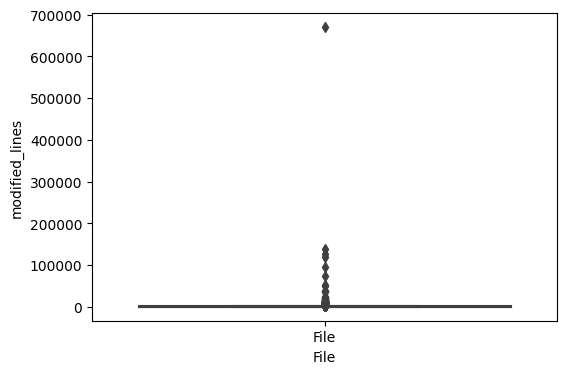

In [22]:
gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot)

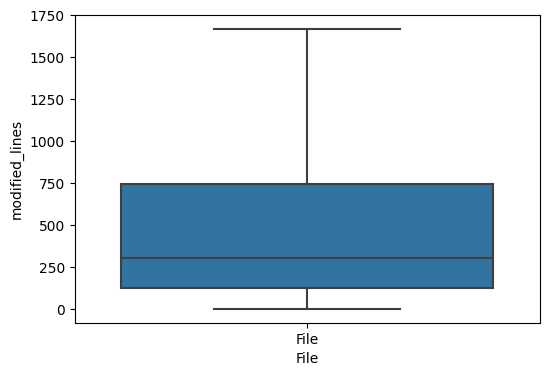

In [23]:
df_accumulated_modified_locs_boxplot_validos = get_accumulated_modified_locs_boxplot_valid(df_accumulated_modified_locs_boxplot)

In [24]:
em_q1, em_q2, em_q3, em_q4 = get_quartiles_offiles_modified_lines(group_files_modified_lines,df_accumulated_modified_locs_boxplot_validos)

1, {'modified_lines': {'.asf.yaml': 39, '.gitattributes': 20, '.gitignore': 2365, '.travis.yml': 231, '50-accumulo.conf': 34, '550e8400-e29b-41d4-a716-446655440000': 0, 'ABlockReader.java': 294, 'ABlockWriter.java': 254, 'ACCUMULO-378-design.mdtext': 2422, 'AESCryptoService.java': 1074, 'AESKeyUtils.java': 153, 'ARS.java': 1110, 'AboutCommand.java': 299, 'AbsractWorkAssigner.java': 60, 'AbstractAccumuloMojo.java': 264, 'AbstractEncoder.java': 163, 'AbstractEvaluatingIterator.java': 2134, 'AbstractHashSampler.java': 289, 'AbstractId.java': 171, 'AbstractInputFormat.java': 14988, 'AbstractLexicoder.java': 61, 'AbstractLexicoderTest.java': 212, 'AbstractMacIT.java': 523, 'AbstractMetricsImpl.java': 2040, 'AbstractQueryLogic.java': 6036, 'AbstractServer.java': 224, 'AbstractTabletFile.java': 69, 'AbstractWorkAssigner.java': 93, 'AbstractWorkAssignerTest.java': 23, 'AcceptableException.java': 71, 'AcceptableThriftTableOperationException.java': 78, 'Accumulo.README': 398, 'Accumulo.java': 25

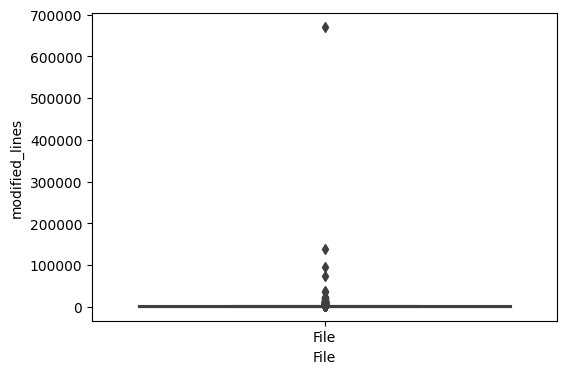

In [25]:
df_locm_java_impl = get_df_accumulated_modified_java_files(df_accumulated_modified_locs)
df_boxplot_em_java_impl = show_boxplot_accumulated_modified_java_files(df_locm_java_impl)

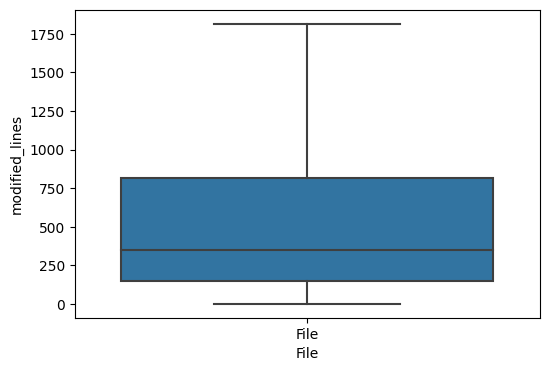

In [26]:
df_boxplot_em_java_impl_valid = get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl)

In [27]:
em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl = get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl_valid)

Quartis do Total de Linhas Modificadas: Q1: [146.], Q2: [350.], Q3: [815.75], Q4: [670823.]


### Testa as métricas de complexidade ciclomática

In [28]:
df_complexidade_ciclomatica = get_complexidade_ciclomatica(df_files_commits_from_db)
df_complexidade_ciclomatica

,file_filename,file_complexity,author_date
331,ABlockReader.java,0.0,2011-10-04 00:46:07.000000
1805,ABlockReader.java,0.0,2011-10-18 17:14:16.000000
2896,ABlockReader.java,0.0,2011-10-19 20:25:11.000000
3826,ABlockReader.java,0.0,2011-10-20 19:45:21.000000
11629,ABlockReader.java,0.0,2012-07-16 14:53:58.000000
...,...,...,...
23046,zooCacheTest.py,4.0,2013-07-08 18:48:45.000000
24400,zooCacheTest.py,4.0,2013-10-15 14:22:12.000000
25415,zooCacheTest.py,4.0,2013-10-30 09:58:33.000000
27128,zooCacheTest.py,4.0,2013-12-28 01:31:48.000000


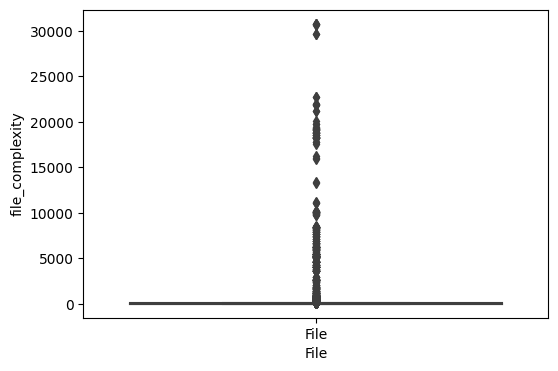

In [29]:
df_cc_temp,df_boxplot_cc_temp = get_boxplot_complexidade_ciclomatica(df_complexidade_ciclomatica)

In [30]:
em_q1_cc_temp,em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp = get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp)

Quartis do Total de Linhas Modificadas: Q1: [7.], Q2: [18.], Q3: [44.], Q4: [30799.]


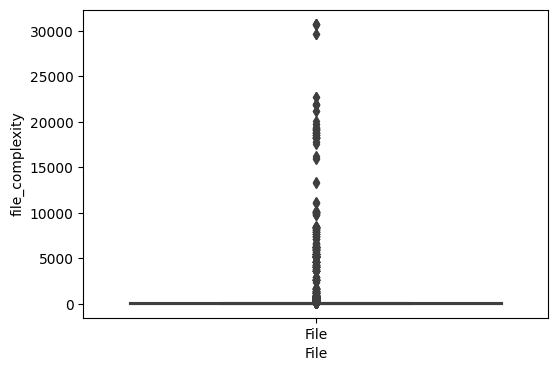

In [31]:
df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl = get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp)

In [32]:
em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl= get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl)

Quartis do Total de Linhas Modificadas: Q1: [8.], Q2: [20.], Q3: [52.], Q4: [30799.]


## Cálculo do FOC e geração da relação AMLOCxFOC

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def calcula_frequencia_commits(df_files_from_db):
  # calcula frequência dos arquivos na faixa de commits analisados
  list_of_files_frequency_in_commits = {}

  # Dataframe agrupados por arquivos e seus commits
  df_groupby_name = df_files_from_db[['name', 'hash']].groupby('name')

  print(f'Quantidade de grupos: {df_groupby_name.ngroups}')
  print(f'Grupos: {df_groupby_name.groups}')

  group_files = df_groupby_name.size()
  print(group_files)
  print('')
  list_of_files_frequency_in_commits = group_files.to_dict()
  print(f'{ len(list_of_files_frequency_in_commits) }, {list_of_files_frequency_in_commits}')

  # Cria um df contendo o arquivo e sua frequencia de commits
  df_fc = pd.DataFrame({'name':group_files.index, 'frequency_commits': group_files.values})

  df_boxplot_fc = df_fc
  # Acrescenta a coluna File
  df_boxplot_fc['File'] = 'File'
  return df_fc, df_boxplot_fc

def gera_boxplot_frequencia_commits(df_boxplot_fc):
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc)
  plt.figure(figsize=(6,4))
  plt.savefig('boxplot_frequencia_commmits.png')
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_no_outliers.png')

def calcula_quartiles_frequencia_commits(df_boxplot_fc):
  fc_q1 = np.percentile(df_boxplot_fc.frequency_commits , [25])
  fc_q2 = np.percentile(df_boxplot_fc.frequency_commits , [50])
  fc_q3 = np.percentile(df_boxplot_fc.frequency_commits , [75])
  fc_q4 = np.percentile(df_boxplot_fc.frequency_commits , [100])

  print(f'Quartis da Frequencia de Commits Q1: {fc_q1}, Q2: {fc_q2}, Q3: {fc_q3}, Q4: {fc_q4}')
  return fc_q1, fc_q2, fc_q3, fc_q4

def gera_boxplot_frequencia_commits_only_java(df_fc):
  # Cria um df sem os arquivos de Teste
  df_fc_no_test = df_fc[(df_fc["name"].str.contains('Test') == False)]

  # Cria um df contendo apenas os arquivos .java de implementacao
  df_fc_java_impl = df_fc_no_test[df_fc_no_test['name'].str.contains('.java', regex=False)]

  df_boxplot_fc_java_impl = df_fc_java_impl[['frequency_commits', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl)
  plt.savefig('boxplot_frequencia_commmits_only_java.png')

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers.png')

  # Remove as frequencias muito baixas (total de commits < 3)
  df_boxplot_fc_java_impl2 = df_boxplot_fc_java_impl.drop(df_boxplot_fc_java_impl[df_boxplot_fc_java_impl.frequency_commits < 3].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl2, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers_less_3.png')
  return df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2

def calcula_quartiles_frequencia_commmits_java_impl(df_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers(df_boxplot_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def gera_df_foc_amloc(df_accumulated_modified_locs):
  df_em_fc = df_accumulated_modified_locs[['name','modified_lines']]
  df_em_fc['frequency_commits'] = df_fc['frequency_commits']
  return df_em_fc

def gera_df_fator_foc_amloc(df_em_fc):
  df_fator_multiplicacao = df_em_fc.copy()
  df_fator_multiplicacao['factor1'] = df_fator_multiplicacao['modified_lines'] * df_fator_multiplicacao['frequency_commits']
  return df_fator_multiplicacao

def gera_scatter_plot_foc_amloc(df_em_fc):
  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in range(df_em_fc.shape[0]):
    if df_em_fc.modified_lines[i] > em_q3 and df_em_fc.frequency_commits[i] > fc_q3:
      plt.text(df_em_fc.modified_lines[i], y=df_em_fc.frequency_commits[i], s=df_em_fc.name[i], alpha=0.8, fontsize=8)
  plt.savefig('scatter_plot_foc_amloc.png')
  plt.show()

def gera_scatter_plot_foc_amloc(df_em_fc):
  # Cria um df sem os arquivos de Teste
  df_em_fc_no_test = df_em_fc[(df_em_fc["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_em_fc_java_impl = df_em_fc_no_test[df_em_fc_no_test['name'].str.contains('.java', regex=False)]

  df_fator_multiplicacao_em_fc_java_impl = df_em_fc_java_impl.copy()
  df_fator_multiplicacao_em_fc_java_impl['factor1'] = df_fator_multiplicacao_em_fc_java_impl['modified_lines'] * df_fator_multiplicacao_em_fc_java_impl['frequency_commits']

  s = df_fator_multiplicacao_em_fc_java_impl.copy()

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])
  plt.savefig('scatter_plot_foc_amloc_only_java.png')
  plt.show()
  return df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl

def gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl):
  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_initial_critical_files_from_sp = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_initial_critical_files_from_sp.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')
  plt.savefig('scatter_plot_foc_amloc_only_java_com_quadrantes.png')
  plt.show()
  return list_initial_critical_files_from_sp

def gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  for item in list_initial_critical_files_from_sp:
    print(item)
  # Pego da secao de analise de Architectural Smells
  # selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
  my_temp_lista_arquivos_criticos = [('StoreController.java', 439, 11), ('UserController.java', 963, 22), ('UserLocationMonitoring.java', 316, 11), ('Users.java', 350, 11)]

  my_temp_lista_arquivos_criticos_names = []
  for i in range(0,  len(my_temp_lista_arquivos_criticos)):
    my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_critical_files = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

  abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

  plt.title(f"Analysis of Promocity Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
      if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_critical_files.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')

  plt.savefig('scatter_plot_mloc_foc_final_java_com_quadrantes.png')
  plt.show()
  return list_critical_files

In [35]:
df_files_from_db[['name', 'hash']].query("name=='.gitignore'")

,name,hash
7184,.gitignore,777c5a2b8c21e0ada12d80ef21ce9e6e03660853
7185,.gitignore,db28ea604554c56e02b7f226e1c12c4210dcb613
7571,.gitignore,e3a270a4ef40bfaa4147d882d48b28e9f3b8f50d
7572,.gitignore,79a253c322bae854c0b9a5792e101e421efcc6b4
8204,.gitignore,184eaf019a1e237c45362909c5e54576a5654613
...,...,...
80880,.gitignore,cf57e343de77f416de10c22e0ed05ef37f433b36
80987,.gitignore,cf57e343de77f416de10c22e0ed05ef37f433b36
81011,.gitignore,cf57e343de77f416de10c22e0ed05ef37f433b36
81038,.gitignore,cf57e343de77f416de10c22e0ed05ef37f433b36


In [36]:
df_fc, df_boxplot_fc = calcula_frequencia_commits(df_files_from_db)

Quantidade de grupos: 4165
Grupos: {'.asf.yaml': [72016, 78921, 84588, 84589], '.gitattributes': [82916], '.gitignore': [7184, 7185, 7571, 7572, 8204, 8206, 10262, 10269, 12711, 12937, 13005, 13076, 13585, 13880, 21469, 21894, 22252, 23496, 23499, 29860, 30003, 30116, 30579, 30649, 30683, 32249, 32250, 32251, 32252, 32253, 32254, 32255, 32256, 32257, 32258, 32259, 32260, 32261, 32262, 32263, 32264, 32265, 32266, 32267, 32268, 32269, 35186, 35192, 39585, 39586, 39587, 42269, 42383, 42384, 42385, 42386, 42389, 42390, 42880, 42898, 42911, 42922, 42930, 42933, 42947, 42948, 42949, 42953, 43772, 43887, 43993, 44467, 44468, 44470, 44472, 44473, 44475, 44476, 44477, 44479, 44480, 44481, 44482, 44483, 44485, 44486, 44487, 44489, 44490, 44492, 44636, 45771, 48177, 48568, 49498, 54856, 55454, 59434, 59909, 66204, ...], '.travis.yml': [32492, 32493, 44965, 44975, 44976, 44977, 44978, 44979, 44982, 45086, 45498, 52456, 52611, 52640, 56657, 58513, 59358, 59420, 59447, 59960, 59962, 63700, 66368, 66

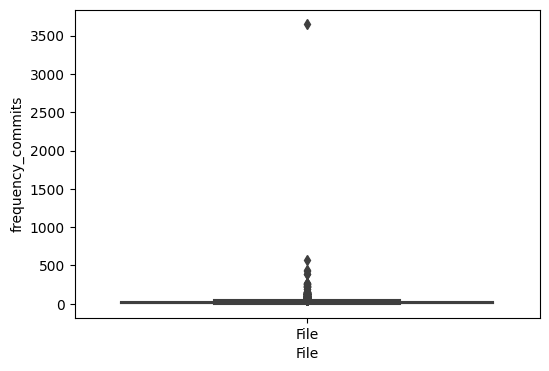

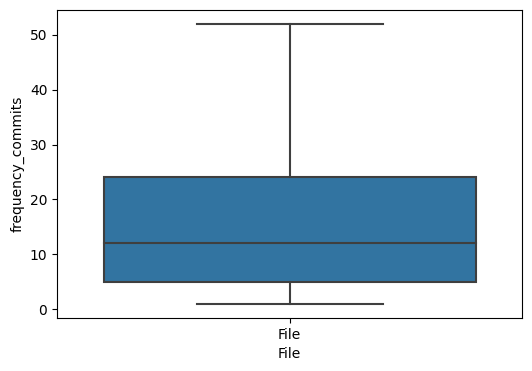

In [37]:
gera_boxplot_frequencia_commits(df_boxplot_fc)

In [38]:
fc_q1,fc_q2, fc_q3, fc_q4 = calcula_quartiles_frequencia_commits(df_boxplot_fc)

Quartis da Frequencia de Commits Q1: [5.], Q2: [12.], Q3: [24.], Q4: [3654.]


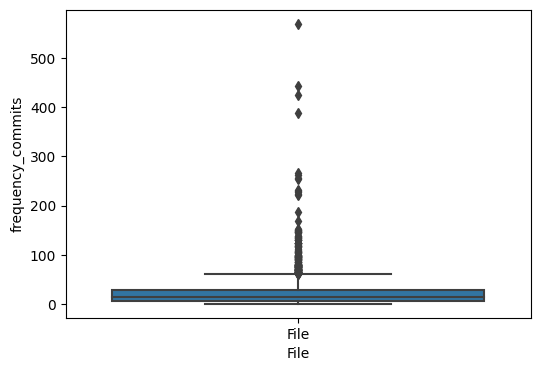

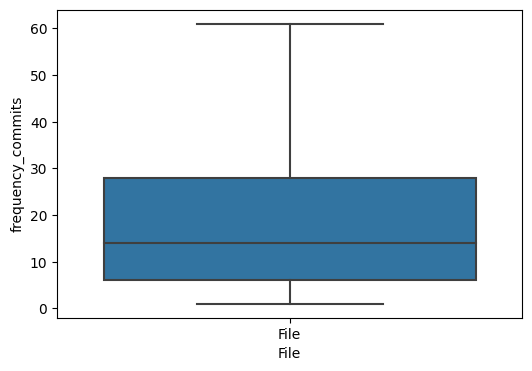

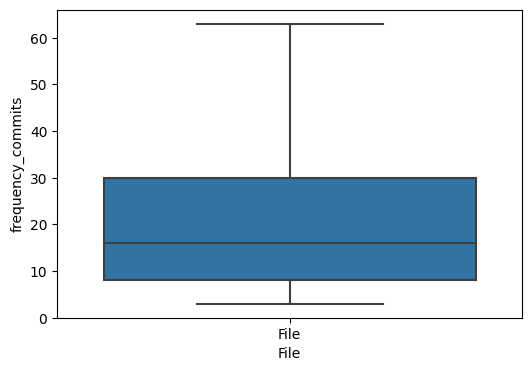

In [39]:
df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2 = gera_boxplot_frequencia_commits_only_java(df_fc)

In [40]:
fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl = calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2)

Quartis da Frequencia de Commits Q1: [8.], Q2: [16.], Q3: [30.], Q4: [569.]


In [41]:
df_em_fc = gera_df_foc_amloc(df_accumulated_modified_locs)
df_em_fc

,name,modified_lines,frequency_commits
0,.asf.yaml,39,4
1,.gitattributes,20,1
2,.gitignore,2365,133
3,.travis.yml,231,30
4,50-accumulo.conf,34,2
...,...,...,...
4160,writers,34,2
4161,zoo-start.sh,70,2
4162,zoo-stop.sh,70,2
4163,zoo.py,118,7


In [42]:
df_fator_multiplicacao = gera_df_fator_foc_amloc(df_em_fc)
df_fator_multiplicacao

,name,modified_lines,frequency_commits,factor1
0,.asf.yaml,39,4,156
1,.gitattributes,20,1,20
2,.gitignore,2365,133,314545
3,.travis.yml,231,30,6930
4,50-accumulo.conf,34,2,68
...,...,...,...,...
4160,writers,34,2,68
4161,zoo-start.sh,70,2,140
4162,zoo-stop.sh,70,2,140
4163,zoo.py,118,7,826


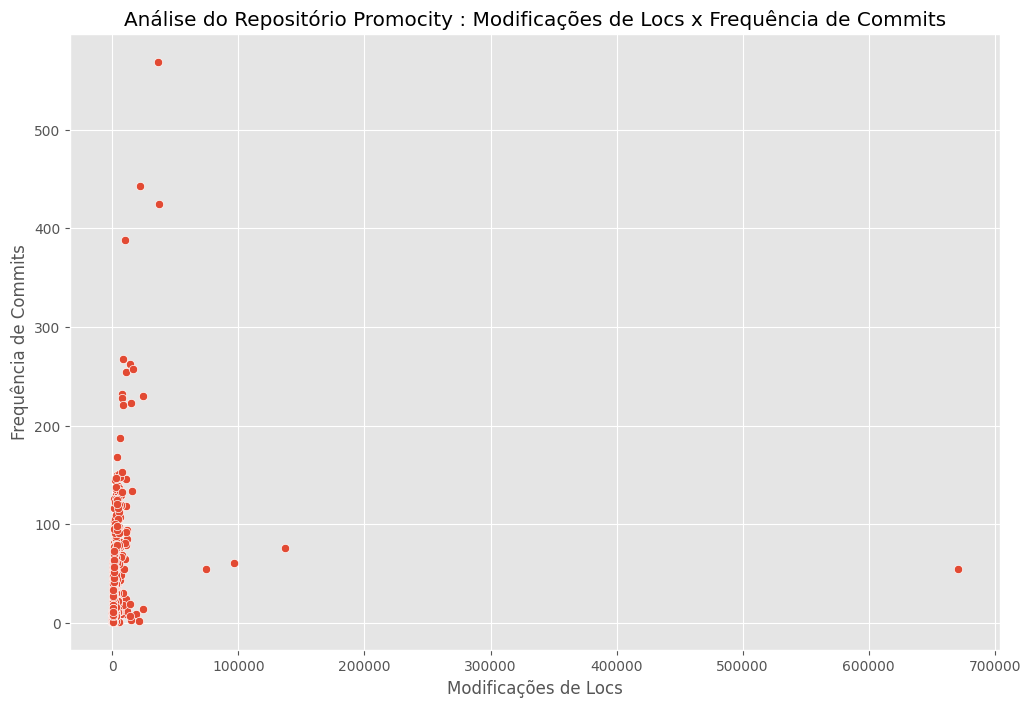

In [43]:
df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl = gera_scatter_plot_foc_amloc(df_em_fc)

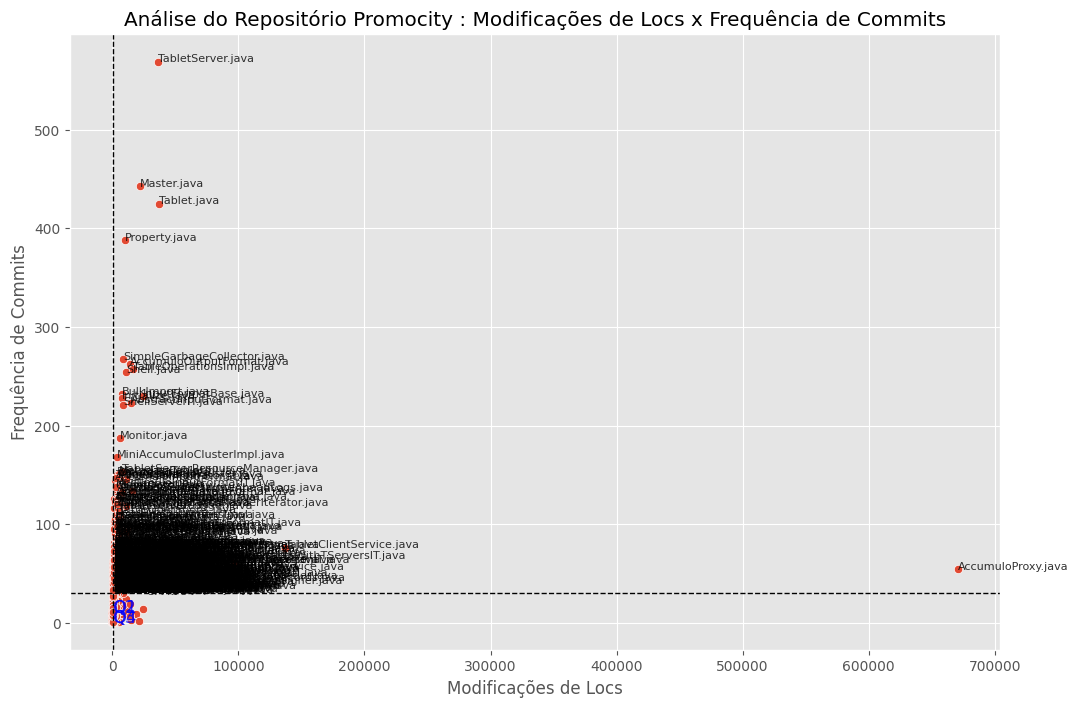

In [44]:
list_initial_critical_files_from_sp = gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl)

In [46]:
len(list_initial_critical_files_from_sp)

413

In [50]:
em_q3_java_impl[0]

815.75

In [54]:
em_q2_java_impl[0]

350.0

In [55]:
fc_q2_java_impl[0]

16.0

In [62]:
def gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  for item in list_initial_critical_files_from_sp:
    print(item)
  # Pego da secao de analise de Architectural Smells
  # selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
  my_temp_lista_arquivos_criticos = list_initial_critical_files_from_sp

  my_temp_lista_arquivos_criticos_names = []
  for i in range(0,  len(my_temp_lista_arquivos_criticos)):
    my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_critical_files = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

  abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

  plt.title(f"Analysis of Promocity Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
      if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_critical_files.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')

  plt.savefig('scatter_plot_mloc_foc_final_java_com_quadrantes.png')
  plt.show()
  return list_critical_files

('AbstractInputFormat.java', 14988, 223)
('Accumulo.java', 2564, 130)
('AccumuloClassLoader.java', 4092, 79)
('AccumuloConfiguration.java', 2855, 79)
('AccumuloException.java', 2515, 33)
('AccumuloFileOutputFormat.java', 4554, 130)
('AccumuloFileOutputFormatIT.java', 2149, 99)
('AccumuloInputFormat.java', 1668, 145)
('AccumuloInputFormatIT.java', 4357, 139)
('AccumuloMultiTableInputFormat.java', 1144, 76)
('AccumuloMultiTableInputFormatIT.java', 1026, 48)
('AccumuloOutputFormat.java', 13659, 262)
('AccumuloOutputFormatIT.java', 2216, 95)
('AccumuloProxy.java', 670823, 54)
('AccumuloRecordReader.java', 1201, 33)
('AccumuloReloadingVFSClassLoader.java', 1461, 45)
('AccumuloReplicaSystem.java', 4251, 96)
('AccumuloRowInputFormat.java', 1601, 125)
('AccumuloRowInputFormatIT.java', 1487, 75)
('AccumuloSecurityException.java', 3355, 53)
('AccumuloVFSClassLoader.java', 3149, 77)
('ActiveCompaction.java', 11120, 79)
('ActiveScan.java', 11830, 85)
('Admin.java', 4171, 147)
('AdminUtil.java', 15

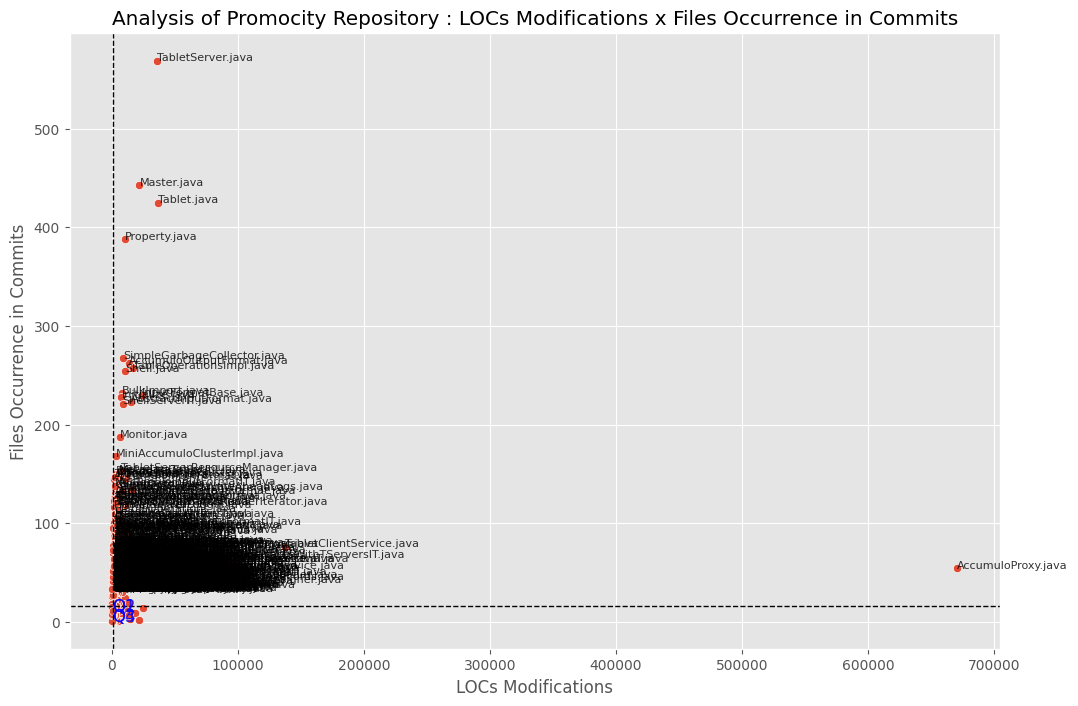

In [157]:
list_critical_files = gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl[0], fc_q2_java_impl[0])

In [158]:
print(f'Qtd: {len(list_critical_files)}, lista: {list_critical_files}')

Qtd: 413, lista: [('AbstractInputFormat.java', 14988, 223), ('Accumulo.java', 2564, 130), ('AccumuloClassLoader.java', 4092, 79), ('AccumuloConfiguration.java', 2855, 79), ('AccumuloException.java', 2515, 33), ('AccumuloFileOutputFormat.java', 4554, 130), ('AccumuloFileOutputFormatIT.java', 2149, 99), ('AccumuloInputFormat.java', 1668, 145), ('AccumuloInputFormatIT.java', 4357, 139), ('AccumuloMultiTableInputFormat.java', 1144, 76), ('AccumuloMultiTableInputFormatIT.java', 1026, 48), ('AccumuloOutputFormat.java', 13659, 262), ('AccumuloOutputFormatIT.java', 2216, 95), ('AccumuloProxy.java', 670823, 54), ('AccumuloRecordReader.java', 1201, 33), ('AccumuloReloadingVFSClassLoader.java', 1461, 45), ('AccumuloReplicaSystem.java', 4251, 96), ('AccumuloRowInputFormat.java', 1601, 125), ('AccumuloRowInputFormatIT.java', 1487, 75), ('AccumuloSecurityException.java', 3355, 53), ('AccumuloVFSClassLoader.java', 3149, 77), ('ActiveCompaction.java', 11120, 79), ('ActiveScan.java', 11830, 85), ('Admi

# Gera e analisa dependências entre os arquivos

In [67]:
import utilidades
import datetime

### Funções

In [68]:
# promocity/src/main/java/ufc/cmu/promocity
def gera_arquivos_java(path_projeto, nome_arquivo='arquivosjava.txt'):
  try:
    # Gera um arquivo contendo todos os arquivos .java do projeto
    query = f'find {path_projeto} -name "*.java" > {nome_arquivo}'
    utilidades.executa_comando(comando=query)
    print(f'Arquivo {nome_arquivo} gerado com sucesso!')
  except Exception as ex:
    print(f'Erro ao gerar o arquivosjava.txt: {str(ex)}')

# Dado 'org.apache.cassandra.index.Index.java'
# Retorne 'pilot/analises/designite/v-3-11-11/src/java/org/apache/cassandra/index/Index.java'

def get_path_file(my_file, src_java_path):
  path_file = None
  my_file = my_file.replace('.java', '') # org.apache.cassandra.index.Index
  my_file = my_file.replace('.', '/') # org/apache/cassandra/index/Index
  my_file = my_file + '.java' # org/apache/cassandra/index/Index.java
  path_file =  src_java_path  + my_file
  return path_file

def teste_find_word_in_file(my_file, my_word):
    with open(my_file) as f:
        datafile = f.readlines()
        found = False  # This isn't really necessary
        for line in datafile:
          if my_word in line:
            # found = True # Not necessary
            return True
    return False  # Because you finished the search without finding

def lista_arquivos_que_dependem_de(my_file, dicionario):
  lista_temp = []
  my_file = my_file.replace('/','.')
  if my_file in dicionario:
    for each in dicionario[my_file]:
      if each[2] == 1:
        lista_temp.append(each)
  return lista_temp

# Cria duas listas contendo o conjunto de arquivos da versão analisada
def cria_duas_listas_arquivos_analisados(nome_arquivo='arquivosjava.txt', diretorio_src_main='promocity/src/main/java/'):
  lista_linhas_arquivos_cassandra = []
  lista_colunas_arquivos_cassandra = []
  with open(nome_arquivo, mode='r+', encoding='utf-8') as file:
    for line in file:
      line = line.rstrip()
      line = line.replace(diretorio_src_main, '')
      line = line.replace('/', '.')
      lista_linhas_arquivos_cassandra.append(line)
      lista_colunas_arquivos_cassandra.append(line)
  return lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra

def cria_dicionario_dsm(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main):
  t1 = datetime.datetime.now()
  dicionario_dsm = {}
  lista_aux = []
  for each_file in lista_linhas_arquivos_cassandra:
    for each_elemento_coluna in lista_colunas_arquivos_cassandra:
      my_search = each_elemento_coluna
      my_search = my_search.replace('.java', ';')
      my_path = get_path_file(my_file=each_file, src_java_path=path_main)
      if teste_find_word_in_file(my_file=my_path,my_word=my_search):
        item = (each_file, each_elemento_coluna, 1)
      else:
        item = (each_file, each_elemento_coluna, 0)
      lista_aux.append(item)
    dicionario_dsm[each_file] = lista_aux
    lista_aux = []
  t2 = datetime.datetime.now()
  delta = t2 - t1
  print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm)}')
  return dicionario_dsm

In [69]:
# path_arquivo_a='ufc.cmu.promocity.backend.context.UserLocationMonitoring.java'
def get_arquivos_A_usa_B(path_arquivo_a, dicionario_dsm):
  # Exemplo: Relação de Arquivos que UserLocationMonitoring.java depende de
  # sao os arquivos Bs que A precisa para sua implementacao
  lista_arquivos = []
  i = 1
  for tupla in dicionario_dsm[path_arquivo_a]:
    if tupla[2] == 1:
      print(f'{i}, {tupla}')
      i = i + 1
      lista_arquivos.append(tupla[1])
  return lista_arquivos

# Dicionario que dado um arquivo X, monta uma matriz de dependencia de X, ou seja, uma lista de arquivos que dependem de X
def cria_dicionario_dsm_depende_de(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main):
  t1 = datetime.datetime.now()
  dicionario_dsm_depende_de = {}
  lista_aux = []

  for each_file in lista_linhas_arquivos_cassandra:
    for each_elemento_coluna in lista_colunas_arquivos_cassandra:
      my_search = each_file
      my_search = my_search.replace('.java', ';')
      my_path = get_path_file(my_file=each_elemento_coluna, src_java_path=path_main)
      if teste_find_word_in_file(my_file=my_path,my_word=my_search):
        item = (each_elemento_coluna, each_file, 1)
      else:
        item = (each_elemento_coluna, each_file, 0)
      lista_aux.append(item)
    dicionario_dsm_depende_de[each_file] = lista_aux
    lista_aux = []

  t2 = datetime.datetime.now()

  delta = t2 - t1

  print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm_depende_de)}')
  return dicionario_dsm_depende_de

def get_arquivos_dependem_de_A(path_arquivo_a, dicionario_dsm_depende_de):
  # Exemplo: Relação de Arquivos que dependem de UserController.java
  lista_arquivos = []
  i = 1
  for tupla in lista_arquivos_que_dependem_de(my_file=path_arquivo_a, dicionario=dicionario_dsm_depende_de):
    if tupla[2] == 1:
      print(f'{i}, {tupla}')
      i += 1
      lista_arquivos.append(tupla[0])
  return lista_arquivos

In [127]:
# Dada uma classe e o arquivo texto contendo todos os arquivos do repositorio,
# retorna o pacote da classe junto com classe
# path = 'promocity/src/main/java/'
def get_file_package(my_file, my_content, path):
  with open(my_content, mode='r+', encoding='utf-8') as file:
    for line in file:
      if my_file in line:
        line = line.replace(path, '')
        line = line.replace('/','.')
        line = line.strip()
        return line

# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a uses file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que file_a chama(importa)
## arquivosjava.txt e dicionario_dsm
def get_dict_file_a_uses_file_b(lista_arquivos_criticos, content, my_dictionary, path_main):
  dict_file_a_uses_file_b = {}
  lista_file_a_uses_file_b = []
  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content, path=path_main)
    if key_file is not None:
      for each_tupla in my_dictionary[key_file]:
        if each_tupla[2] == 1:
          lista_file_a_uses_file_b.append(each_tupla[1])
      dict_file_a_uses_file_b[key_file] = lista_file_a_uses_file_b
      lista_file_a_uses_file_b = []
  return dict_file_a_uses_file_b

# Todo: revisar, pois está substituindo config.java por GuardrailsConfig.java
# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a depende de file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que dependem de file_a
## content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de
def get_dict_file_impact_other_files(lista_arquivos_criticos, content, my_dictionary, path_main):
  dict_file_impact_other_files = {}
  lista_file_a_depends_on_file_b = []

  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content, path=path_main)
    if key_file is not None:
      for tupla in lista_arquivos_que_dependem_de(my_file=key_file, dicionario=my_dictionary):
        if tupla[2] == 1:
          lista_file_a_depends_on_file_b.append(tupla[0])
      dict_file_impact_other_files[key_file] = lista_file_a_depends_on_file_b
      lista_file_a_depends_on_file_b = []
  return dict_file_impact_other_files

In [128]:
def mostra_lista_arquivos_dependentes(lista_arquivos_criticos, content, my_dictionary, path_main):
  # Dado um arquivo chave, mostra a lista de arquivos que dependem do arquivo chave
  dict_arquivos_dependentes_arquivos_criticos = get_dict_file_impact_other_files(lista_arquivos_criticos, content, my_dictionary, path_main)

  lista_arquivos_impactados = []
  l_ac = []
  l_adac = []
  l_tamanho_adac = []
  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    print(key, value)
    l_ac.append(key)
    l_tamanho_adac.append(len(value))
    l_adac.append(value)

  return dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados, l_ac, l_adac, l_tamanho_adac

def gera_df_arquivos_dependentes_arquivos_criticos(l_ac, l_tamanho_adac, l_adac):
  df_arquivos_dependentes_arquivos_criticos = pd.DataFrame({'arquivos_criticos':l_ac, 'qtd_arquivos_dependentes':l_tamanho_adac, 'arquivos_dependentes':l_adac})
  try:
    df_arquivos_dependentes_arquivos_criticos.to_csv('arquivos_dependentes_arquivos_criticos.csv')
  except Exception as ex:
    print(f'Erro ao salvar o arquivo arquivos_dependentes_arquivos_criticos.csv : {str(ex)}')
  return df_arquivos_dependentes_arquivos_criticos

# lista_arquivos_impactados_unicos
def gera_lista_arquivos_impactados_unicos(dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados):
  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    print(f"Mudanças na classe {key} podem impactar {len(value)} classes")

  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    lista_arquivos_impactados = lista_arquivos_impactados + value

  set_lista_arquivos_impactados = set(lista_arquivos_impactados)
  lista_arquivos_impactados_unicos = list(set_lista_arquivos_impactados)
  return lista_arquivos_impactados_unicos

In [72]:
def relatorio_linhas_alteradas_pelas_classes_criticas(lista_arquivos_impactados_unicos,lista_arquivos_criticos, df_em_fc_java_impl, df_files_commits_from_db):
  # Quantidade de arquivos impactados pelas classes críticas
  print(f"Existem {len(lista_arquivos_impactados_unicos)} classes que podem ser impactados pelas {len(lista_arquivos_criticos)} classes críticas.")

  print(f'Classes críticas: {len(lista_arquivos_criticos)}')
  print(f'Classes impactadas: {len(lista_arquivos_impactados_unicos)}')
  print(f'Total de classes .java do sistema: {df_em_fc_java_impl.shape[0]}')

  print(f'Existem {len(lista_arquivos_criticos)} arquivos: {[item[0] for item in lista_arquivos_criticos]} que podem impactar {len(lista_arquivos_impactados_unicos)} dos {df_em_fc_java_impl.shape[0]} arquivos .java')
  print(f'{len(lista_arquivos_impactados_unicos)} Potenciais arquivos impactados: {lista_arquivos_impactados_unicos}')

  # df.groupby(['A','C'])['B'].sum()
  df_lm = df_files_commits_from_db.copy()
  qtd_lm = df_lm[['file_is_java','file_filename', 'modified_lines']][df_lm.file_is_java==1].groupby('file_filename')['modified_lines'].sum()
  df_qtd_lm = qtd_lm.to_frame()
  #df_qtd_lm['file_filename'] = df_qtd_lm.index
  df_qtd_lm = df_qtd_lm.reset_index()
  #df_qtd_lm

  # Quantidade de linhas modificadas dos arquivos criticos
  dict_modified_lines_arquivos_criticos = {}

  for each in lista_arquivos_criticos:
    qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each[0]]['modified_lines'].to_list()
    if len(qtd_temp) == 1:
      dict_modified_lines_arquivos_criticos[each[0]] = qtd_temp[0]

  #dict_modified_lines_arquivos_criticos

  soma_modified_lines_arquivos_criticos = 0
  for key, value in dict_modified_lines_arquivos_criticos.items():
    soma_modified_lines_arquivos_criticos = soma_modified_lines_arquivos_criticos + value

  print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas mudaram {soma_modified_lines_arquivos_criticos} linhas no sistema')

  lista_nomes_arquivos_impactados_unicos = []

  for each in lista_arquivos_impactados_unicos:
    each = each.split('.')
    temp = each[-2] + '.' + each[-1]
    lista_nomes_arquivos_impactados_unicos.append(temp)
  return lista_nomes_arquivos_impactados_unicos, df_qtd_lm, dict_modified_lines_arquivos_criticos, soma_modified_lines_arquivos_criticos

In [149]:
# Dada uma classe critica e um dataframe contendo todos os commits analisados
# retorna a lista de arquivos que sao modificados junto com o arquivo critico
def get_lista_arquivos_modificados_with_critico(filename, df):
  lista_temp_arquivos = []
  lista_temp = []

  lista_arquivos_modificados_com_filename = df[df['modified_files'].str.contains(filename)]['modified_files'].to_list()

  for each in lista_arquivos_modificados_com_filename:
    lista_temp = each.split(',')
    lista_temp_arquivos = lista_temp_arquivos + lista_temp
    lista_temp = []

  set_lista_temp_arquivos = set(lista_temp_arquivos)
  lista_temp_arquivos_unicos = list(set_lista_temp_arquivos)
  return lista_temp_arquivos_unicos

# Data a lista de arquivos criticos e todos os commits da faixa analisada
# retorna um dicionario com chave no arquivo critico e a lista dos arquivos que sao modificados em conjunto com ele.
def get_dict_arquivos_modificados_with_critico(lista, df):
  dict_arquivos_modificados_with_critico = {}
  lista_temp = []
  for filename in lista:
    lista_temp = get_lista_arquivos_modificados_with_critico(filename[0], df)
    dict_arquivos_modificados_with_critico[filename[0]] = lista_temp
    lista_temp = []
  return dict_arquivos_modificados_with_critico

# Dado um arquivo critico,
# retorna a lista de arquivos impactados por ele
def get_arquivos_impactados_por_file(lista, filename, path_main):
  lista_arquivos_criticos = lista
  lista_temp = []
  for key, value in get_dict_file_impact_other_files(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main=path_main).items():
    if filename in key:
      lista_temp = []
      for file in value:
        temp = file.split('.')[-2]
        temp = temp + '' + '.java'
        lista_temp.append(temp)
  return lista_temp

# dicionário de arquivos criticos e seus arquivos que dependem dele e também sao co-change
def get_dict_arquivos_dependem_e_cochange_critico(lista, path_main):
  lista_arquivos_criticos = lista
  dict_arquivos_dependem_e_cochange_critico = {}

  for filename in lista_arquivos_criticos:
    lista_temp_dependem_filename = get_arquivos_impactados_por_file(lista_arquivos_criticos, filename[0], path_main)
    lista_temp_cochange_filename = dict_arquivo_critico_cochange[filename[0]]

    lista_arquivos_dependem_de_and_cochange_filename = []
    for each in lista_temp_dependem_filename:
      if each in lista_temp_cochange_filename:
        lista_arquivos_dependem_de_and_cochange_filename.append(each)

    dict_arquivos_dependem_e_cochange_critico[filename[0]] = lista_arquivos_dependem_de_and_cochange_filename

  return dict_arquivos_dependem_e_cochange_critico

### Testes de dependencias entre os arquivos

Arquivo A depende de B

In [159]:
!ls -lia accumulo/core/src/main/java

total 12
787076 drwxr-xr-x 3 root root 4096 Jul 14 23:10 .
787066 drwxr-xr-x 9 root root 4096 Jul 14 23:10 ..
787077 drwxr-xr-x 3 root root 4096 Jul 14 23:10 org


In [160]:
!cd accumulo && git ls-files | grep -c '\.java$'

2051


In [161]:
gera_arquivos_java(path_projeto="accumulo/core/src/main/java", nome_arquivo='arquivosjava.txt')

Arquivo arquivosjava.txt gerado com sucesso!


In [162]:
lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra = cria_duas_listas_arquivos_analisados(nome_arquivo='arquivosjava.txt', diretorio_src_main='accumulo/core/src/main/java/')

In [163]:
dicionario_dsm = cria_dicionario_dsm(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main="accumulo/core/src/main/java/")

Tempo para criar o dicionarário dsm: 0:00:12.409964, itens percorridos: 649


In [ ]:
for k,v in dicionario_dsm.items():
  print(k)

In [164]:
lista_a_usa_b = get_arquivos_A_usa_B('org.apache.accumulo.core.fate.AdminUtil.java', dicionario_dsm)

1, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.fate.zookeeper.FateLock.java', 1)
2, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.fate.zookeeper.ZooReader.java', 1)
3, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.fate.zookeeper.ZooReaderWriter.java', 1)
4, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.lock.ServiceLock.java', 1)
5, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.util.FastFormat.java', 1)


In [81]:
lista_a_usa_b

['org.apache.accumulo.core.fate.zookeeper.FateLock.java',
 'org.apache.accumulo.core.fate.zookeeper.ZooReader.java',
 'org.apache.accumulo.core.fate.zookeeper.ZooReaderWriter.java',
 'org.apache.accumulo.core.lock.ServiceLock.java',
 'org.apache.accumulo.core.util.FastFormat.java']

In [165]:
dicionario_dsm_depende_de = cria_dicionario_dsm_depende_de(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main="accumulo/core/src/main/java/")

Tempo para criar o dicionarário dsm: 0:00:14.902432, itens percorridos: 649


In [ ]:
for k,v in dicionario_dsm_depende_de.items():
  print(k)

In [166]:
lista_x_depende_y = get_arquivos_dependem_de_A('org.apache.accumulo.core.fate.zookeeper.FateLock.java', dicionario_dsm_depende_de)

1, ('org.apache.accumulo.core.fate.AdminUtil.java', 'org.apache.accumulo.core.fate.zookeeper.FateLock.java', 1)


In [87]:
lista_x_depende_y

['org.apache.accumulo.core.fate.AdminUtil.java']

In [167]:
lista_arquivos_criticos = list_critical_files
print(len(lista_arquivos_criticos))
print(lista_arquivos_criticos)

413
[('AbstractInputFormat.java', 14988, 223), ('Accumulo.java', 2564, 130), ('AccumuloClassLoader.java', 4092, 79), ('AccumuloConfiguration.java', 2855, 79), ('AccumuloException.java', 2515, 33), ('AccumuloFileOutputFormat.java', 4554, 130), ('AccumuloFileOutputFormatIT.java', 2149, 99), ('AccumuloInputFormat.java', 1668, 145), ('AccumuloInputFormatIT.java', 4357, 139), ('AccumuloMultiTableInputFormat.java', 1144, 76), ('AccumuloMultiTableInputFormatIT.java', 1026, 48), ('AccumuloOutputFormat.java', 13659, 262), ('AccumuloOutputFormatIT.java', 2216, 95), ('AccumuloProxy.java', 670823, 54), ('AccumuloRecordReader.java', 1201, 33), ('AccumuloReloadingVFSClassLoader.java', 1461, 45), ('AccumuloReplicaSystem.java', 4251, 96), ('AccumuloRowInputFormat.java', 1601, 125), ('AccumuloRowInputFormatIT.java', 1487, 75), ('AccumuloSecurityException.java', 3355, 53), ('AccumuloVFSClassLoader.java', 3149, 77), ('ActiveCompaction.java', 11120, 79), ('ActiveScan.java', 11830, 85), ('Admin.java', 4171

In [ ]:
for k, v in dicionario_dsm.items():
  print(k)

In [168]:
# arquivosjava.txt e dicionario_dsm
get_dict_file_a_uses_file_b(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm, path_main="accumulo/core/src/main/java/")

{'org.apache.accumulo.core.client.Accumulo.java': ['org.apache.accumulo.core.client.lexicoder.Lexicoder.java',
  'org.apache.accumulo.core.client.rfile.RFile.java',
  'org.apache.accumulo.core.clientImpl.ClientContext.java'],
 'org.apache.accumulo.core.conf.AccumuloConfiguration.java': [],
 'org.apache.accumulo.core.client.AccumuloException.java': [],
 'org.apache.accumulo.core.client.AccumuloSecurityException.java': [],
 'org.apache.accumulo.core.client.admin.ActiveCompaction.java': ['org.apache.accumulo.core.data.TabletId.java',
  'org.apache.accumulo.core.client.TableNotFoundException.java',
  'org.apache.accumulo.core.client.IteratorSetting.java'],
 'org.apache.accumulo.core.client.admin.ActiveScan.java': ['org.apache.accumulo.core.data.Column.java',
  'org.apache.accumulo.core.data.TabletId.java',
  'org.apache.accumulo.core.security.Authorizations.java'],
 'org.apache.accumulo.core.fate.AdminUtil.java': ['org.apache.accumulo.core.fate.zookeeper.FateLock.java',
  'org.apache.accum

In [169]:
get_dict_file_a_uses_file_b(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main="accumulo/core/src/main/java/")

{'org.apache.accumulo.core.client.Accumulo.java': ['org.apache.accumulo.core.client.Accumulo.java',
  'org.apache.accumulo.core.client.Accumulo.java'],
 'org.apache.accumulo.core.conf.AccumuloConfiguration.java': ['org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloConfiguration.java',
  'org.apache.accumulo.core.conf.AccumuloCon

In [170]:
# Relação de Arquivos que dependem de Users.java
dict_file_impact_other_files = {}
lista_file_a_depends_on_file_b = []

for tupla in lista_arquivos_que_dependem_de(my_file='org.apache.accumulo.core.clientImpl.bulk.BulkImport.java', dicionario=dicionario_dsm_depende_de):
  if tupla[2] == 1:
    lista_file_a_depends_on_file_b.append(tupla[0])

dict_file_impact_other_files['org.apache.accumulo.core.clientImpl.bulk.BulkImport.java'] = lista_file_a_depends_on_file_b

dict_file_impact_other_files['org.apache.accumulo.core.clientImpl.bulk.BulkImport.java']

len(dict_file_impact_other_files['org.apache.accumulo.core.clientImpl.bulk.BulkImport.java'])

1

In [171]:
dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados, l_ac, l_adac, l_tamanho_adac = mostra_lista_arquivos_dependentes(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main="accumulo/core/src/main/java/")

org.apache.accumulo.core.client.Accumulo.java ['org.apache.accumulo.core.util.Merge.java', 'org.apache.accumulo.core.clientImpl.ClientInfo.java']
org.apache.accumulo.core.conf.AccumuloConfiguration.java ['org.apache.accumulo.core.fate.Fate.java', 'org.apache.accumulo.core.fate.zookeeper.ZooReaderWriter.java', 'org.apache.accumulo.core.util.Merge.java', 'org.apache.accumulo.core.util.ConfigurationImpl.java', 'org.apache.accumulo.core.util.compaction.CompactionServicesConfig.java', 'org.apache.accumulo.core.util.ratelimit.SharedRateLimiterFactory.java', 'org.apache.accumulo.core.util.threads.ThreadPools.java', 'org.apache.accumulo.core.util.LocalityGroupUtil.java', 'org.apache.accumulo.core.file.blockfile.cache.impl.BlockCacheManagerFactory.java', 'org.apache.accumulo.core.file.blockfile.cache.impl.BlockCacheConfiguration.java', 'org.apache.accumulo.core.file.blockfile.impl.ScanCacheProvider.java', 'org.apache.accumulo.core.file.rfile.GenerateSplits.java', 'org.apache.accumulo.core.file.

In [172]:
df_arquivos_dependentes_arquivos_criticos = gera_df_arquivos_dependentes_arquivos_criticos(l_ac, l_tamanho_adac, l_adac)

In [173]:
df_arquivos_dependentes_arquivos_criticos

,arquivos_criticos,qtd_arquivos_dependentes,arquivos_dependentes
0,org.apache.accumulo.core.client.Accumulo.java,2,"[org.apache.accumulo.core.util.Merge.java, org..."
1,org.apache.accumulo.core.conf.AccumuloConfigur...,39,"[org.apache.accumulo.core.fate.Fate.java, org...."
2,org.apache.accumulo.core.client.AccumuloExcept...,41,[org.apache.accumulo.core.util.LocalityGroupUt...
3,org.apache.accumulo.core.client.AccumuloSecuri...,37,[org.apache.accumulo.core.client.admin.Instanc...
4,org.apache.accumulo.core.client.admin.ActiveCo...,2,[org.apache.accumulo.core.clientImpl.InstanceO...
...,...,...,...
118,org.apache.accumulo.core.fate.zookeeper.ZooRea...,5,"[org.apache.accumulo.core.fate.AdminUtil.java,..."
119,org.apache.accumulo.core.fate.zookeeper.ZooSes...,1,[org.apache.accumulo.core.util.compaction.Exte...
120,org.apache.accumulo.core.fate.ZooStore.java,0,[]
121,org.apache.accumulo.core.fate.zookeeper.ZooUti...,2,[org.apache.accumulo.core.lock.ServiceLock.jav...


In [174]:
lista_arquivos_impactados_unicos = gera_lista_arquivos_impactados_unicos(dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados)
print(f'Arquivos impactados unicos: {lista_arquivos_impactados_unicos}')


Mudanças na classe org.apache.accumulo.core.client.Accumulo.java podem impactar 2 classes
Mudanças na classe org.apache.accumulo.core.conf.AccumuloConfiguration.java podem impactar 39 classes
Mudanças na classe org.apache.accumulo.core.client.AccumuloException.java podem impactar 41 classes
Mudanças na classe org.apache.accumulo.core.client.AccumuloSecurityException.java podem impactar 37 classes
Mudanças na classe org.apache.accumulo.core.client.admin.ActiveCompaction.java podem impactar 2 classes
Mudanças na classe org.apache.accumulo.core.client.admin.ActiveScan.java podem impactar 2 classes
Mudanças na classe org.apache.accumulo.core.fate.AdminUtil.java podem impactar 0 classes
Mudanças na classe org.apache.accumulo.core.iterators.user.AgeOffFilter.java podem impactar 0 classes
Mudanças na classe org.apache.accumulo.core.fate.AgeOffStore.java podem impactar 0 classes
Mudanças na classe org.apache.accumulo.core.security.Authorizations.java podem impactar 33 classes
Mudanças na class

In [175]:
lista_nomes_arquivos_impactados_unicos, df_qtd_lm, dict_modified_lines_arquivos_criticos, soma_modified_lines_arquivos_criticos = relatorio_linhas_alteradas_pelas_classes_criticas(lista_arquivos_impactados_unicos,lista_arquivos_criticos, df_em_fc_java_impl, df_files_commits_from_db)

Existem 270 classes que podem ser impactados pelas 413 classes críticas.
Classes críticas: 413
Classes impactadas: 270
Total de classes .java do sistema: 2678
Existem 413 arquivos: ['AbstractInputFormat.java', 'Accumulo.java', 'AccumuloClassLoader.java', 'AccumuloConfiguration.java', 'AccumuloException.java', 'AccumuloFileOutputFormat.java', 'AccumuloFileOutputFormatIT.java', 'AccumuloInputFormat.java', 'AccumuloInputFormatIT.java', 'AccumuloMultiTableInputFormat.java', 'AccumuloMultiTableInputFormatIT.java', 'AccumuloOutputFormat.java', 'AccumuloOutputFormatIT.java', 'AccumuloProxy.java', 'AccumuloRecordReader.java', 'AccumuloReloadingVFSClassLoader.java', 'AccumuloReplicaSystem.java', 'AccumuloRowInputFormat.java', 'AccumuloRowInputFormatIT.java', 'AccumuloSecurityException.java', 'AccumuloVFSClassLoader.java', 'ActiveCompaction.java', 'ActiveScan.java', 'Admin.java', 'AdminUtil.java', 'AgeOffFilter.java', 'AgeOffStore.java', 'AggregatingIterator.java', 'AlterTablePerm.java', 'AsyncS

### Testes de impacto de mudancas

In [176]:
# Quantidade de linhas modificadas dos arquivos impactados
dict_modified_lines_arquivos_impactados = {}

for each in lista_nomes_arquivos_impactados_unicos:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_modified_lines_arquivos_impactados[each] = qtd_temp[0]
  else:
    dict_modified_lines_arquivos_impactados[each] = 0

soma_modified_lines_arquivos_impactados = 0
for key, value in dict_modified_lines_arquivos_impactados.items():
  soma_modified_lines_arquivos_impactados = soma_modified_lines_arquivos_impactados + value

print(f'As {len(dict_modified_lines_arquivos_impactados)} classes impactadas, pelos arquivos críticos, mudaram {soma_modified_lines_arquivos_impactados} linhas no sistema')

As 268 classes impactadas, pelos arquivos críticos, mudaram 359751 linhas no sistema


In [177]:
## Soma de todas as linhas modificadas pelos arquivos .java
qtd_arquivos_java = df_qtd_lm.shape[0]
qtd_modified_lines_arquivos_java = df_qtd_lm['modified_lines'].sum()

print(f'{qtd_arquivos_java} arquivos mudaram {qtd_modified_lines_arquivos_java} LOC no sistema')

# As classes críticas e as classes impactada correspondem a X linhas modificadas
# o que dá P % de linhas modificadas no sistema

soma_modified_lines_analisadas = soma_modified_lines_arquivos_criticos + soma_modified_lines_arquivos_impactados

percentual_modified_lines_analisadas = round( (soma_modified_lines_analisadas/qtd_modified_lines_arquivos_java) * 100 , 2)

print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas e as {len(dict_modified_lines_arquivos_impactados)} classes impactadas correspondem a {percentual_modified_lines_analisadas}% das linhas modificadas no sistema')


3370 arquivos mudaram 3780952 LOC no sistema
As 413 classes criticas e as 268 classes impactadas correspondem a 66.75% das linhas modificadas no sistema


In [178]:
# Dataframe contendo todos os commits da faixa analisada
df = df_commits_from_db[['name', 'modified_files']]

# Lista arquivos críticos
print(f'{len(lista_arquivos_criticos)}, {lista_arquivos_criticos}')

# Arquivos impactados únicos
print(f' {len(lista_arquivos_impactados_unicos)}, {lista_arquivos_impactados_unicos}')

# Dicionário com o arquivo crítico e todos os seus arquivos co-change (além dos arquivos de implementação existem os arquivos .txt, de configuração, testes, entre outros)
dict_arquivo_critico_cochange = get_dict_arquivos_modificados_with_critico(lista_arquivos_criticos, df)
print(f'{len(dict_arquivo_critico_cochange)}')

413, [('AbstractInputFormat.java', 14988, 223), ('Accumulo.java', 2564, 130), ('AccumuloClassLoader.java', 4092, 79), ('AccumuloConfiguration.java', 2855, 79), ('AccumuloException.java', 2515, 33), ('AccumuloFileOutputFormat.java', 4554, 130), ('AccumuloFileOutputFormatIT.java', 2149, 99), ('AccumuloInputFormat.java', 1668, 145), ('AccumuloInputFormatIT.java', 4357, 139), ('AccumuloMultiTableInputFormat.java', 1144, 76), ('AccumuloMultiTableInputFormatIT.java', 1026, 48), ('AccumuloOutputFormat.java', 13659, 262), ('AccumuloOutputFormatIT.java', 2216, 95), ('AccumuloProxy.java', 670823, 54), ('AccumuloRecordReader.java', 1201, 33), ('AccumuloReloadingVFSClassLoader.java', 1461, 45), ('AccumuloReplicaSystem.java', 4251, 96), ('AccumuloRowInputFormat.java', 1601, 125), ('AccumuloRowInputFormatIT.java', 1487, 75), ('AccumuloSecurityException.java', 3355, 53), ('AccumuloVFSClassLoader.java', 3149, 77), ('ActiveCompaction.java', 11120, 79), ('ActiveScan.java', 11830, 85), ('Admin.java', 417

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [179]:
#1) Arquivos que dependem de "BulkImport.java":
lista_dependem_storageservice = get_arquivos_impactados_por_file(lista_arquivos_criticos,"BulkImport.java", "accumulo/core/src/main/java/")
print(f'Arquivos que dependem de "BulkImport.java": {len(lista_dependem_storageservice)}')

#2) Arquivos que foram commitados pelo menos uma vez com "BulkImport.java"
filename = "BulkImport.java"
lista_cochange_storageservice = dict_arquivo_critico_cochange[filename]
print(f'Arquivos que foram commitados pelo menos uma vez com "BulkImport.java": {len(lista_cochange_storageservice)}')

#3) Lista arquivos depedentes e cochange com critico
lista_arquivos_dependem_de_and_cochange_storageservice = []
for each in lista_dependem_storageservice:
  if each in lista_cochange_storageservice:
    lista_arquivos_dependem_de_and_cochange_storageservice.append(each)
print(f'QTD de arquivos_dependem_de_and_cochange_UserController: {len(lista_arquivos_dependem_de_and_cochange_storageservice)}')
print('')
print(f'Arquivos que dependem de UserController e são co-change: {lista_arquivos_dependem_de_and_cochange_storageservice}')

Arquivos que dependem de "BulkImport.java": 1
Arquivos que foram commitados pelo menos uma vez com "BulkImport.java": 3547
QTD de arquivos_dependem_de_and_cochange_UserController: 1

Arquivos que dependem de UserController e são co-change: ['TableOperationsImpl.java']


In [180]:
# Dicionário contendo o arquivo crítico, os arquivos que ele impacta e são commitados em conjunto pelo menos uma vez.
for key, value in get_dict_file_impact_other_files(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main="accumulo/core/src/main/java/").items():
  print(key, value)

lista_arquivos_impactados_com_cochange = []
lista_arquivos_criticos_temp = []
lista_dependente_e_cochange = []
lista_tamanho_dependente_e_cochange = []
for key, value in get_dict_arquivos_dependem_e_cochange_critico(lista_arquivos_criticos, path_main="accumulo/core/src/main/java/").items():
  print(f'A classe {key} impacta outras {len(value)} classes que dependem de {key} e são co-change com {key} ')
  lista_arquivos_criticos_temp.append(key)
  lista_dependente_e_cochange.append(value)
  lista_tamanho_dependente_e_cochange.append(len(value))

  lista_arquivos_impactados_com_cochange = lista_arquivos_impactados_com_cochange + value

dict_my_criticos_atd = {'arquivos_criticos': lista_arquivos_criticos_temp, 'qtd_dependentes_e_cochange':lista_tamanho_dependente_e_cochange, 'dependentes_e_cochange':lista_dependente_e_cochange}
df_my_criticos_atd = pd.DataFrame(dict_my_criticos_atd)
print(df_my_criticos_atd)

try:
  df_my_criticos_atd.to_csv('arquivos_dependentes_e_cochange_com_arquivos_criticos.csv')
except Exception as ex:
  print(f'Erro ao salvar o arquivo arquivos_dependentes_e_cochange_com_arquivos_criticos.csv: {str(ex)}')

org.apache.accumulo.core.client.Accumulo.java ['org.apache.accumulo.core.util.Merge.java', 'org.apache.accumulo.core.clientImpl.ClientInfo.java']
org.apache.accumulo.core.conf.AccumuloConfiguration.java ['org.apache.accumulo.core.fate.Fate.java', 'org.apache.accumulo.core.fate.zookeeper.ZooReaderWriter.java', 'org.apache.accumulo.core.util.Merge.java', 'org.apache.accumulo.core.util.ConfigurationImpl.java', 'org.apache.accumulo.core.util.compaction.CompactionServicesConfig.java', 'org.apache.accumulo.core.util.ratelimit.SharedRateLimiterFactory.java', 'org.apache.accumulo.core.util.threads.ThreadPools.java', 'org.apache.accumulo.core.util.LocalityGroupUtil.java', 'org.apache.accumulo.core.file.blockfile.cache.impl.BlockCacheManagerFactory.java', 'org.apache.accumulo.core.file.blockfile.cache.impl.BlockCacheConfiguration.java', 'org.apache.accumulo.core.file.blockfile.impl.ScanCacheProvider.java', 'org.apache.accumulo.core.file.rfile.GenerateSplits.java', 'org.apache.accumulo.core.file.

In [181]:
df_my_criticos_atd

,arquivos_criticos,qtd_dependentes_e_cochange,dependentes_e_cochange
0,AbstractInputFormat.java,0,[]
1,Accumulo.java,2,"[Merge.java, ClientInfo.java]"
2,AccumuloClassLoader.java,0,[]
3,AccumuloConfiguration.java,39,"[Fate.java, ZooReaderWriter.java, Merge.java, ..."
4,AccumuloException.java,40,"[LocalityGroupUtil.java, InstanceOperations.ja..."
...,...,...,...
408,ZooTabletStateStore.java,0,[]
409,ZooTraceClient.java,0,[]
410,ZooUtil.java,2,"[ServiceLock.java, ClientContext.java]"
411,ZooZap.java,0,[]


In [184]:
df_my_criticos_atd.query("qtd_dependentes_e_cochange>0")

,arquivos_criticos,qtd_dependentes_e_cochange,dependentes_e_cochange
1,Accumulo.java,2,"[Merge.java, ClientInfo.java]"
3,AccumuloConfiguration.java,39,"[Fate.java, ZooReaderWriter.java, Merge.java, ..."
4,AccumuloException.java,40,"[LocalityGroupUtil.java, InstanceOperations.ja..."
19,AccumuloSecurityException.java,36,"[InstanceOperations.java, NamespaceOperations...."
21,ActiveCompaction.java,2,"[InstanceOperationsImpl.java, ActiveCompaction..."
...,...,...,...
398,ZooCache.java,12,"[ServiceLock.java, CleanerUtil.java, TableMap...."
404,ZooReader.java,5,"[AdminUtil.java, MonitorUtil.java, ExternalCom..."
405,ZooReaderWriter.java,3,"[AdminUtil.java, ZooStore.java, ServiceLock.java]"
406,ZooSession.java,1,[ExternalCompactionUtil.java]


In [183]:
df_temp2 = df_my_criticos_atd[['arquivos_criticos', 'qtd_dependentes_e_cochange']].sort_values('qtd_dependentes_e_cochange', ascending = False)
df_temp2

sum(df_temp2['qtd_dependentes_e_cochange'])

# dicionario contendo o arquivo impactado e suas linhas modificadas
dict_arquivos_impactados_com_cochange = {}

for each in lista_arquivos_impactados_com_cochange:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_arquivos_impactados_com_cochange[each] = qtd_temp[0]
  else:
    dict_arquivos_impactados_com_cochange[each] = 0

print(f'Qtd arquivos impactados com co-change: {len(dict_arquivos_impactados_com_cochange)}, {dict_arquivos_impactados_com_cochange}')

soma_modified_lines_arquivos_impactados_com_cochange = 0

for key, value in dict_arquivos_impactados_com_cochange.items():
  soma_modified_lines_arquivos_impactados_com_cochange = soma_modified_lines_arquivos_impactados_com_cochange + value

soma_modified_lines_arquivos_impactados_com_cochange

print(f'Existem {qtd_arquivos_java} classes que mudaram um total de {qtd_modified_lines_arquivos_java} LOCs no sistema dentro da faixa analisada')

print(f'Existem {len(dict_arquivos_impactados_com_cochange)} classes que podem indicar ATD e mudaram {soma_modified_lines_arquivos_impactados_com_cochange} LOCs no sistema dentro da faixa analisada')

print(f'A estimativa do esforço gasto com ATD foi de {soma_modified_lines_arquivos_impactados_com_cochange} LOCs em relação ao total de {qtd_modified_lines_arquivos_java} LOCs alteradas no sistema dentro da faixa analisada')

print(f'Percentual de esforço (ATD) gasto com alterações de linhas: {round((soma_modified_lines_arquivos_impactados_com_cochange / qtd_modified_lines_arquivos_java) * 100, 2)}% do total de linhas alteradas dentro da faixa analisada')


Qtd arquivos impactados com co-change: 265, {'Merge.java': 2765, 'ClientInfo.java': 90, 'Fate.java': 2258, 'ZooReaderWriter.java': 2877, 'ConfigurationImpl.java': 156, 'CompactionServicesConfig.java': 281, 'SharedRateLimiterFactory.java': 419, 'ThreadPools.java': 1478, 'LocalityGroupUtil.java': 1510, 'BlockCacheManagerFactory.java': 133, 'BlockCacheConfiguration.java': 350, 'ScanCacheProvider.java': 90, 'GenerateSplits.java': 496, 'RFileOperations.java': 1101, 'SplitLarge.java': 589, 'BloomFilterLayer.java': 4101, 'FileOperations.java': 3139, 'RFileScanner.java': 788, 'RFileWriterBuilder.java': 284, 'CryptoFactoryLoader.java': 122, 'ClassLoaderUtil.java': 135, 'SystemIteratorUtil.java': 186, 'DeletingIterator.java': 714, 'IteratorConfigUtil.java': 73, 'TraceUtil.java': 895, 'VolumeConfiguration.java': 570, 'SamplerFactory.java': 125, 'SamplerConfigurationImpl.java': 275, 'MetricsUtil.java': 176, 'BulkImport.java': 7878, 'ClientContext.java': 2758, 'ClientConfConverter.java': 806, 'Tabl